C:\Users\y-kobayashi\Anaconda3\envs\rein-env\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


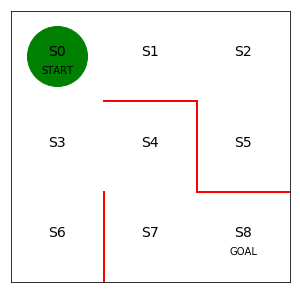

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(5,5))
ax = plt.gca()

plt.plot([1,1],[0,1],color='red', linewidth=2)
plt.plot([1,2],[2,2],color='red', linewidth=2)
plt.plot([2,2],[2,1],color='red', linewidth=2)
plt.plot([2,3],[1,1],color='red', linewidth=2)
    
plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

ax.set_xlim(0, 3)
ax.set_ylim(0, 3)

plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off',right='off', left='off', labelleft='off')

line, = ax.plot([0.5], [2.5], marker="o",color='g', markersize=60)



In [2]:
theta_0 = np.array([[np.nan, 1, 1, np.nan], #S0
                    [np.nan, 1, np.nan, 1], #S1
                    [np.nan, np.nan, 1, 1], #S2
                    [1, 1, 1, np.nan], #S3
                    [np.nan, np.nan, 1, 1], #S4
                    [1, np.nan, np.nan, np.nan], #S5
                    [1, np.nan, np.nan, np.nan], #S6
                    [1, 1, np.nan, np.nan], #S7
                   ])
theta_0

array([[nan,  1.,  1., nan],
       [nan,  1., nan,  1.],
       [nan, nan,  1.,  1.],
       [ 1.,  1.,  1., nan],
       [nan, nan,  1.,  1.],
       [ 1., nan, nan, nan],
       [ 1., nan, nan, nan],
       [ 1.,  1., nan, nan]])

In [33]:
[a, b] = theta_0.shape
Q = np.random.rand(a, b)*theta_0*0.1
Q

array([[       nan, 0.06778649, 0.07194448,        nan],
       [       nan, 0.09152951,        nan, 0.00924002],
       [       nan,        nan, 0.08755309, 0.06030321],
       [0.08872595, 0.00382458, 0.07945276,        nan],
       [       nan,        nan, 0.07468158, 0.0945511 ],
       [0.03456733,        nan,        nan,        nan],
       [0.01132875,        nan,        nan,        nan],
       [0.02427499, 0.08373672,        nan,        nan]])

In [4]:
def simple_convert_into_pi_from_theta(theta):
    
    [m,n] = theta.shape
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i, :]/np.nansum(theta[i, :])
    
    pi = np.nan_to_num(pi)
    
    return pi

pi_0 = simple_convert_into_pi_from_theta(theta_0)
pi_0

array([[0.        , 0.5       , 0.5       , 0.        ],
       [0.        , 0.5       , 0.        , 0.5       ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [0.33333333, 0.33333333, 0.33333333, 0.        ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.5       , 0.5       , 0.        , 0.        ]])

In [5]:
def get_action(s, Q, epsilon, pi_0):
    
    direction = ["up", "right", "down", "left"]
    
    if np.random.rand() < epsilon:
        next_direction = np.random.choice(direction, p=pi_0[s, :])
    else:
        next_direction = direction[np.nanargmax(Q[s, :])]
    
    if next_direction == "up":
        action = 0
    if next_direction == "right":
        action = 1
    if next_direction == "down":
        action = 2
    if next_direction == "left":
        action = 3
    
    return action

def get_s_next(s, a, Q, epsilon, pi_0):
    
    direction = ["up", "right", "down", "left"]
    next_action = direction[a]
    
    if next_action == "up":
        s_next = s - 3
    if next_action == "right":
        s_next = s + 1
    if next_action == "down":
        s_next = s + 3
    if next_action == "left":
        s_next = s - 1

    return s_next

In [6]:
def Sarsa(s, a, r, s_next, a_next, Q, eta, gamma):
    #print(Q[4])
    #print(" ")
    if s_next ==8:
        Q[s, a] = Q[s, a] + eta*(r - Q[s, a])
    else:
        Q[s, a] = Q[s, a] + eta*(r + gamma*Q[s_next, a_next] - Q[s, a])
    
    return Q

#new_Q = Sarsa(7, 1, 1, 8, 0, Q, 0.1, 0.1)
#Q_0=Q
#Q_0[7,0]=0.01
#Q_0[7,1]=1
#for i in range(10):
#    new_Q = Sarsa(4, 2, Q_0[4,2], 7, 1, Q_0, 0.2, 0.2)
#    Q_42 = new_Q[4,2]
#    Q_43 = new_Q[4,3]
#    new_Q_42 = Q_42/(Q_42+Q_43)
#    new_Q_43 = Q_43/(Q_42+Q_43)
#    new_Q[4,2] = new_Q_42
#    new_Q[4,3] = new_Q_43
#    Q_0=new_Q

In [27]:
def goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi):
    
    s = 0
    a = a_next = get_action(s, Q, epsilon, pi)
    s_a_history = [[0, np.nan]]
    
    while(1):
        a = a_next
        s_a_history[-1][1] = a
        s_next = get_s_next(s, a, Q, epsilon, pi)
        s_a_history.append([s_next, np.nan])
        
        if s_next==8:
            r=1
            a_next = np.nan
        else:
            r=0
            a_next = get_action(s_next, Q, epsilon, pi)
        
        Q = Sarsa(s, a, r, s_next, a_next, Q ,eta, gamma)
        
        if s_next==8:
            break
        else:
            s = s_next
    
    return [s_a_history, Q]

#print(Q)
#q=Q
#for i in range(10):
#    q=goal_maze_ret_s_a_Q(Q, 0.1, 0.1, 0.9, pi_0)
#q

In [31]:

eta = 0.1
gamma = 0.9
epsilon = 0.5

v = np.nanmax(Q, axis=1)
V =[]
V.append(np.nanmax(Q, axis=1))

is_continue = True
episode = 1

while is_continue:
    
    print("エピソード：" + str(episode))
    epsilon = epsilon/2
    
    [s_a_history, Q] = goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi_0)
    
    new_v = np.nanmax(Q, axis=1)
    print(np.sum(np.abs(new_v - v)))
    v = new_v
    V.append(v)
    
    print("step : {0}".format(len(s_a_history)-1))
    
    episode = episode +1
    if episode >100:
        break


エピソード：1
0.09884119000000001
step : 22
エピソード：2
0.09010000000000001
step : 6
エピソード：3
0.08989570710000003
step : 10
エピソード：4
0.09498456882180001
step : 18
エピソード：5
0.08838928319372101
step : 10
エピソード：6
0.08362132157726104
step : 4
エピソード：7
0.08526700532055158
step : 10
エピソード：8
0.08161025886809996
step : 4
エピソード：9
0.08073273817449003
step : 4
エピソード：10
0.079803498174201
step : 4
エピソード：11
0.07881415108078586
step : 4
エピソード：12
0.07775811643766485
step : 4
エピソード：13
0.07663069608266117
step : 4
エピソード：14
0.07542904941000728
step : 4
エピソード：15
0.07415209792242038
step : 4
エピソード：16
0.07280038197036572
step : 4
エピソード：17
0.07137588757010102
step : 4
エピソード：18
0.0698818571002581
step : 4
エピソード：19
0.06832259434892479
step : 4
エピソード：20
0.06670327169253235
step : 4
エピソード：21
0.0650297450269515
step : 4
エピソード：22
0.06330838034930342
step : 4
エピソード：23
0.061545894529602796
step : 4
エピソード：24
0.05974921175007575
step : 4
エピソード：25
0.05792533627278856
step : 4
エピソード：26
0.05608124157781494
step : 4
エピソード：27
0.05422377

In [32]:
from matplotlib import animation
from IPython.display import HTML
import matplotlib.cm as cm

def init():
    
    line.set_data([], [])
    return (line,)


def animate(i):
    
    line, = ax.plot([0.5], [2.5], marker="s", color=cm.jet(V[i][0]), markersize=85)
    line, = ax.plot([1.5], [2.5], marker="s", color=cm.jet(V[i][1]), markersize=85)
    line, = ax.plot([2.5], [2.5], marker="s", color=cm.jet(V[i][2]), markersize=85)
    line, = ax.plot([0.5], [1.5], marker="s", color=cm.jet(V[i][3]), markersize=85)
    line, = ax.plot([1.5], [1.5], marker="s", color=cm.jet(V[i][4]), markersize=85)
    line, = ax.plot([2.5], [1.5], marker="s", color=cm.jet(V[i][5]), markersize=85)
    line, = ax.plot([0.5], [0.5], marker="s", color=cm.jet(V[i][6]), markersize=85)
    line, = ax.plot([1.5], [0.5], marker="s", color=cm.jet(V[i][7]), markersize=85)
    line, = ax.plot([2.5], [0.5], marker="s", color=cm.jet(1.0), markersize=85)

    return(line,)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(V), interval=200, repeat=False)

HTML(anim.to_jshtml())